## <a id='top'></a>

# CSCI 3202, Fall 2020
# Assignment 4
# Due: Wednesday 25 November 2020 by 11:59 PM

<br> 

### Your name: Jeremy M. Hein

<br> 


---
## Problem 1: Navigating an awkward situation with grace and poise

<img src='https://www.explainxkcd.com/wiki/images/5/5f/interaction.png' style="width: 600px;"/>


Suppose you are at a social event where you would like to avoid any interaction with a large number of the other attendees. It's not that you don't like them, it's just that you don't like *talking to* them. A few of your good friends are also in attendance, but they are tucked away in a corner. The rectangular room in which the event is being held spans gridcells at $x=1,2,\ldots, 6$ and $y=1,2,\ldots, 5$. At the eastern edge ($x=6$) of this first floor room, there is a balcony, with a 6-foot drop. If the event becomes unbearably awkward, you can jump off the balcony and run away. Of course, this might hurt a little bit, so we should incorporate this into our reward structure.

The terminal states and rewards associated with them are given in the diagram below. The states are represented as $(x,y)$ tuples. The available actions in non-terminal states include moving exactly 1 unit North (+y), South (-y), East (+x) or West (-x), although you should not include walking into walls, because that would be embarrassing in front of all these other people. Represent actions as one of 'N', 'S', 'E', or 'W'. For now, assume all non-terminal states have a default reward of -0.01, and use a discount factor of 0.99.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp.png" style="width: 400px;"/>

Use the following transition model for this decision process, if you are trying to move from state $s$ to state $s'$:
* you successfully move from $s$ to $s'$ with probability 0.6
* the remaining 0.4 probability is spread equally likely across state $s$ **and** all adjacent (N/S/E/W) states except for $s'$. Note that this does not necessarily mean that all adjacent states have 0.1, because some states do not have 4 adjacent states.


### (1a)

Complete the `MDP` class below. The docstring comments provide some desired specifications. You may add additional methods or attributes, if you would like.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import unittest

In [193]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        self.nrow = nrow
        self.ncol = ncol
        self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount        
        

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        
        if state in self.terminal_states:
            return [None]
        elif state == (1,1): #we are in bottom left corner and can only move N or E
            return ['N', 'E']
        elif state[0] == 1: #we are at column 1 and cannot move W
            return ['N', 'E', 'S']
        elif state[1] == 1: #we are at row 1 and cannot move S
            return ['N', 'E', 'W']
        elif state[1] == 5: #we are at row 5 and cannot move N
            return ['S', 'E', 'W']
        else:
            return ['N', 'S', 'E', 'W']
        
        
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        return self.terminal_states[state] if state in self.terminal_states.keys() else self.default_reward
        
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        assert action in self.actions(state), 'Error: action needs to be available in that state'
        assert state in self.states, 'Error: invalid state'
        
        x = state[0]
        y = state[1]
        
        if action == 'N':
            return (x,y+1)
            
        elif action == 'S':
            return (x,y-1)
            
        elif action == 'E':
            return (x+1,y)
            
        elif action == 'W':
            return (x-1,y)

        
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        p_action = 0.6
        p_else = 0.4/(len(self.actions(state)))
        x = state[0]
        y = state[1] 
        
        if action is None:
            return [(0, state)]
        
        elif state == (1,1): #we are in bottom left corner and can only move N or E or stay put
            if action == 'N':
                return [(p_action, (x,y+1)), (p_else, (x+1,y)), (p_else, (x,y))]
            elif action == 'E':
                return [(p_action, (x+1,y)), (p_else, (x,y+1)), (p_else, (x,y))]
            
        elif state[0] == 1: #we are at column 1 and cannot move W
            if action == 'N':
                return [(p_action, (x,y+1)), (p_else, (x+1,y)), (p_else, (x,y-1)), (p_else, (x,y))]
            elif action == 'E':
                return [(p_action, (x+1,y)), (p_else, (x,y+1)), (p_else, (x,y-1)), (p_else, (x,y))]
            elif action == 'S':
                return [(p_action, (x,y-1)), (p_else, (x+1,y)), (p_else, (x,y+1)), (p_else, (x,y))]
            
        elif state[1] == 1: #we are at row 1 and cannot move S
            if action == 'N':
                return [(p_action, (x,y+1)), (p_else, (x+1,y)), (p_else, (x-1,y)), (p_else, (x,y))]
            elif action == 'E':
                return [(p_action, (x+1,y)), (p_else, (x,y+1)), (p_else, (x-1,y)), (p_else, (x,y))]
            elif action == 'W':
                return [(p_action, (x-1,y)), (p_else, (x+1,y)), (p_else, (x,y+1)), (p_else, (x,y))]
            
            
        elif state[1] == 5: #we are at row 5 and cannot move N
            if action == 'E':
                return [(p_action, (x+1,y)), (p_else, (x,y-1)), (p_else, (x-1,y)), (p_else, (x,y))]
            elif action == 'W':
                return [(p_action, (x-1,y)), (p_else, (x,y-1)), (p_else, (x+1,y)), (p_else, (x,y))]
            elif action == 'S':
                return [(p_action, (x,y-1)), (p_else, (x+1,y)), (p_else, (x-1,y)), (p_else, (x,y))]
            
        else:
            if action == 'N':
                return [(p_action, (x,y+1)), (p_else, (x,y-1)), (p_else, (x+1,y)), (p_else, (x-1,y)), (p_else, (x,y))]

            elif action == 'S':
                return [(p_action, (x,y-1)), (p_else, (x,y+1)), (p_else, (x+1,y)), (p_else, (x-1,y)), (p_else, (x,y))]

            elif action == 'E':
                return [(p_action, (x+1,y)), (p_else, (x,y+1)), (p_else, (x,y-1)), (p_else, (x-1,y)), (p_else, (x,y))]

            elif action == 'W':
                return [(p_action, (x-1,y)), (p_else, (x,y+1)), (p_else, (x,y-1)), (p_else, (x+1,y)), (p_else, (x,y))]

**Now:** create an `MDP` object to represent the decision process in this problem.

To test and get comfortable with your `MDP` class methods and attributes, and making the relevant calculations with this structure, calculate the expected utility of walking north from (1,1). Assume initially that all states $(x,y)$ have a utility of $x+y$ (including the terminal states).

In [203]:
nrow = 5
ncol = 6
default_reward = -0.01
discount = 0.99
terminal = {(1,5):2, (1,4):2, (1,3):-1, 
            (2,1):-1, 
            (3,1):-1, (3,4):-1, (3,5):1, 
            (4,3):-1, (4,4):-1, 
            (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5}
mdp = MDP(nrow, ncol, terminal, default_reward, discount)
mdp.states
actions = mdp.actions((1,1)) #get possibe actions
print (actions)
t = mdp.transition((1,1), 'N') #get transition model from moving N
print(t)

#multiply probabilities and utilities and sum together
#utility = p(1,2)*3 + p(2,1)*3 + p(1,1)*2
utility = t[0][0]*(t[0][1][0]+t[0][1][1]) + t[1][0]*(t[1][1][0]+t[1][1][1])+ t[2][0]*(t[2][1][0]+t[2][1][1])
print (utility)

['N', 'E']
[(0.6, (1, 2)), (0.2, (2, 1)), (0.2, (1, 1))]
2.8


#### Unit tests
Note that these are non-exhaustive, because there is some flexibility in how the `transition` method works.

In [195]:
tests_to_run = unittest.TestLoader().loadTestsFromModule(Tests_Problem1())
unittest.TextTestRunner().run(tests_to_run)

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### (1b)

Implement value iteration to calculate the utilities for each state.  Also implement a function that takes as arguments an `MDP` object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy.  The optimal policy dictionary should have state tuples as keys and the optimal move (None, N, S, E or W) as values.

In [197]:
def value_iteration(mdp, tol=1e-3):
    gamma = mdp.df #discount factor for MDP
    
    utility_new = {s : 0 for s in mdp.states} #initilize utility for all states
    
    while True:
        
        utility_old = utility_new.copy()
        max_change = 0
        
        for s in mdp.states:
            
            # for each available action, what next states
            # are possible, and their probabilities?
            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            best_utility = -999
            for i in range(len(next_states)): 
                
                newsum = 0
                for j in range(len(next_states[i])):
                    prob_sprime = next_states[i][j][0]
                    utility = utility_old[next_states[i][j][1]]
                    newsum = newsum + prob_sprime * utility
                    best_utility = max(best_utility, newsum)
                    if len(next_states)==1:
                        best_utility = newsum
                        
            # new utility of s = reward(s) + discounted max expected utility
            utility_new[s] = mdp.reward(s) + gamma*best_utility
            # update maximum change in utilities, if needed
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))

        if (gamma == 1 and max_change < tol) or max_change < tol*(1-gamma)/gamma:
            break
    return utility_new
    

def find_policy(mdp, utility):
    
    # initialize the policy for each state
    policy = {s : None for s in mdp.states}

    # loop over states to find the action that maximizes expected utility
    for s in mdp.states:

        # initialize the best utility to something very bad, so we can improve it
        best_utility = (-999, None)

        # loop over actions, find which gives the highest expected utility
        for a in mdp.actions(s):

            # calculate the expected utility of action a from state s
            newsum = sum([p*utility[s2] for p, s2 in mdp.transition(s,a)])

            # if this action has higher expected utility than the current best,
            # replace the best (utility, action) tuple with this one
            if newsum > best_utility[0]:
                best_utility = (newsum, a)

        # now we have the action (second element) that leads
        # to the highest expected utility (first element)
        policy[s] = best_utility[1]
    return policy

    
value_dict = value_iteration(mdp)
policy_dict = find_policy(mdp,value_dict)
policy_dict
    



{(1, 1): 'N',
 (1, 2): 'E',
 (1, 3): None,
 (1, 4): None,
 (1, 5): None,
 (2, 1): None,
 (2, 2): 'N',
 (2, 3): 'N',
 (2, 4): 'W',
 (2, 5): 'W',
 (3, 1): None,
 (3, 2): 'W',
 (3, 3): 'W',
 (3, 4): None,
 (3, 5): None,
 (4, 1): 'N',
 (4, 2): 'W',
 (4, 3): None,
 (4, 4): None,
 (4, 5): 'W',
 (5, 1): 'N',
 (5, 2): 'W',
 (5, 3): 'N',
 (5, 4): 'N',
 (5, 5): 'W',
 (6, 1): None,
 (6, 2): None,
 (6, 3): None,
 (6, 4): None,
 (6, 5): None}

Now actually use your `value_iteration` and `find_policy` functions to calculate the utility for each state in this MDP, and the optimal action in each state.

As a sanity check, print the utilities of these terminal states:
1. `utility[(1,5)]`
1. `utility[(6,1)]`

and print the utility of these states that are nearby to terminal states, so their utilities should be similar to the nearby terminal states' utilities:
1. `utility[(2,5)]`
1. `utility[(5,3)]`

And print the policy for these states to make sure they make sense:
1. `policy[(2,4)]`
1. `policy[(1,1)]`

In [198]:
print ("Terminal state (1,5):", value_dict[(1,5)])
print ("Terminal state (6,1):", value_dict[(6,1)])
print()
print ("Utility of state (2,5):", value_dict[(2,5)])
print ("Utility of state (5,3):", value_dict[(5,3)])
print()
print ("Policy for state (2,4):", policy_dict[(2,5)])
print ("Policy for state (1,1):", policy_dict[(5,3)])

Terminal state (1,5): 2.0
Terminal state (6,1): -5.0

Utility of state (2,5): 1.7370596703662071
Utility of state (5,3): 0.1363955644093944

Policy for state (2,4): W
Policy for state (1,1): N


### (1c)

If we enter the room at (5,1), what is the optimal path for us to follow?  Create a graphic to illustrate this policy pathway, either by generating a plot in Python (like the maze solution path) or by uploading a hand-drawn image and including it below.

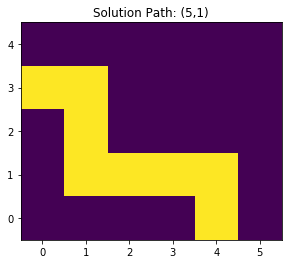

In [199]:
#function to return a path of state tuples given a starting tuple and a utility dictionary
def path(start,utility):
    path = []
    move = utility[start]
    state = start
    while move != None:
        path.append(state)
        if move == 'N':
            state = (state[0],state[1]+1)
        elif move == 'S':
            state = (state[0],state[1]-1)
        elif move == 'E':
            state = (state[0]+1,state[1])
        elif move == 'W':
            state = (state[0]-1,state[1])
            
        move = utility[state]
    path.append(state)
    return path

#function to plot a path in a maze (modified from HW 2)
def plot_maze(mdp,path, title):
    rows = mdp.nrow
    cols = mdp.ncol
    maze = [[0 for i in range(cols)] for j in range(rows)]
    for i in range (0,5):
        for j in range(0,6):
            l =[i+1,j+1]
            tupe = tuple(l)
            if tupe in path:
                maze[j][i] = 2
    
    cmap = plt.cm.gray
    plt.imshow(maze,  origin='lower')
    plt.title(title)
    plt.show()

my_path = path((5,1), policy_dict)
my_path
plot_maze(mdp, my_path, 'Solution Path: (5,1)')

Note that in the graph above, the rows and columns are 0-based index as opposed to the 1-based indexing presented in the problem.  The moves are still the same, however.  The path is N->W->W->W->N->N->W, arriving at the termial state (1,4)

### (1d)

From (3,2) the optimal move is to walk West. If we are trying to go talk to our friends in the Northwest corner, why would we rather do this than walk North first, then West?

If we were to walk North from (3,2), we would have two termial states with negative utilities next to us (N and E).  If we walk West, there is only one terminal state with negative utility next to us (S).  Since the transition function assigns a probability that we may walk in the wrong direction, it's better to walk West because there is a lower likelyhood that we will walk in the wrong direction and thus end up in an unfavorable terminal state.

### (1e)

How painfully awkward do you need to set the default reward for non-terminal states before the optimal move from (5,1) becomes jumping off the balcony immediately and running away?  Round your answer to two decimal places.

In [200]:
def painfully_awkward(default):
    nrow = 5
    ncol = 6
    default_reward = default
    discount = 0.99
    terminal = {(1,5):2, (1,4):2, (1,3):-1, 
                (2,1):-1, 
                (3,1):-1, (3,4):-1, (3,5):1, 
                (4,3):-1, (4,4):-1, 
                (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5}
    mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    value_dict = value_iteration(mdp)
    policy_dict = find_policy(mdp,value_dict)
    optimal_move = policy_dict[(5,1)]
    while optimal_move != 'E':
        default_reward = default_reward-.01
        mdp = MDP(nrow, ncol, terminal, default_reward, discount)
        value_dict = value_iteration(mdp)
        policy_dict = find_policy(mdp,value_dict)
        optimal_move = policy_dict[(5,1)]
        
    return default_reward
    
awkwardness =  painfully_awkward(-0.01)
print ("When the default reward is: ", awkwardness, "the optimal move is to jump off the balcony")
    

When the default reward is:  -4.40999999999995 the optimal move is to jump off the balcony


### (1f)

In **1e** we assumed a certain level of loss (negative reward) just for being present.  But a more realistic approach might be to instead change the reward structure for the terminal states. Consider the terminal states with -1 reward in the default model. Let $R^*$ denote the reward associated with these states. How low does $R^*$ need to be in order for us to immediately jump off the balcony and run away? Use the default non-terminal state reward of -0.01. Write a few sentences interpreting your result.

In [201]:
def painfully_awkward2():
    nrow = 5
    ncol = 6
    tracker = -1
    default_reward = -0.01
    discount = 0.99
    terminal = {(1,5):2, (1,4):2, (1,3):-1, 
                (2,1):-1, 
                (3,1):-1, (3,4):-1, (3,5):1, 
                (4,3):-1, (4,4):-1, 
                (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5}
    mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    value_dict = value_iteration(mdp)
    policy_dict = find_policy(mdp,value_dict)
    optimal_move = policy_dict[(5,1)]
    while optimal_move != 'E':
    #for i in range(0,3):
        dict13 = {(1,3): terminal[(1,3)]-1}
        dict21 = {(2,1): terminal[(2,1)]-1}
        dict31 = {(3,1): terminal[(3,1)]-1}
        dict34 = {(3,4): terminal[(3,4)]-1}
        dict43 = {(4,3): terminal[(4,3)]-1}
        dict44 = {(4,4): terminal[(4,4)]-1}
        terminal.update(dict13)
        terminal.update(dict21)
        terminal.update(dict31)
        terminal.update(dict34)
        terminal.update(dict43)
        terminal.update(dict44)
        print (terminal)
        
        value_dict = value_iteration(MDP(nrow, ncol, terminal, default_reward, discount))
        policy_dict = find_policy(MDP(nrow, ncol, terminal, default_reward, discount),value_dict)
        optimal_move = policy_dict[(5,1)]
        print (value_dict)
        tracker = tracker-1
        
    return tracker
    
awkwardness =  painfully_awkward2()
print ("When the default reward is: ", awkwardness, "the optimal move is to jump off the balcony")

{(1, 5): 2, (1, 4): 2, (1, 3): -2, (2, 1): -2, (3, 1): -2, (3, 4): -2, (3, 5): 1, (4, 3): -2, (4, 4): -2, (6, 1): -5, (6, 2): -5, (6, 3): -5, (6, 4): -5, (6, 5): -5}
{(1, 1): 0.1814203864250546, (1, 2): 0.32225836890412257, (1, 3): -2.0, (1, 4): 2.0, (1, 5): 2.0, (2, 1): -2.0, (2, 2): 0.5593579705471304, (2, 3): 0.9585160442998486, (2, 4): 1.4440459704304045, (2, 5): 1.7288180237112083, (3, 1): -2.0, (3, 2): 0.3776347637214763, (3, 3): 0.5593579705471304, (3, 4): -2.0, (3, 5): 1.0, (4, 1): 0.12678186140061243, (4, 2): 0.21431378416256372, (4, 3): -2.0, (4, 4): -2.0, (4, 5): 0.584, (5, 1): 0.07182184445597227, (5, 2): 0.13775424499737057, (5, 3): 0.13477281212485948, (5, 4): 0.22076847731968735, (5, 5): 0.36603729734419205, (6, 1): -5.0, (6, 2): -5.0, (6, 3): -5.0, (6, 4): -5.0, (6, 5): -5.0}
{(1, 5): 2, (1, 4): 2, (1, 3): -3, (2, 1): -3, (3, 1): -3, (3, 4): -3, (3, 5): 1, (4, 3): -3, (4, 4): -3, (6, 1): -5, (6, 2): -5, (6, 3): -5, (6, 4): -5, (6, 5): -5}
{(1, 1): 0.1814203864250546, (1

KeyboardInterrupt: 

### (1g)

Given the problem context, write a few sentences about why this is or is not an appropriate transition model. Include an interpretation of the terminal states.

I don't think this is an appropriate transition model, primarily because of the termial states.  The terminal states assume that the people at the social event are stationary for the duration of our visit.  Seeing as this is a social event, it is more likely the the people in attendance will be moving around, and thus our model should be reflective of that.  Termial states that represnt the balcony should remain stationary.

The probabilities assigned to successfuly moving from state $s$ to $s^\prime$ make sense.  While we likely wouldn't actually walk in the wrong direction, it is somewhat likely that someone would stop us to chat along the way, and thus we wouldn't successfully move to $s^\prime$

<br>

---

## Problem 2: HMMs

You are trying to diagnose whether your computer is broken or not. On a given day, your computer's hidden state is either *broken* or *working*. Each day you make one of the following observations: *blue-screen*, *slow*, or *snappy*, depending on the state of your computer. You decide to use the following HMM to model your daily observations. Note, "Emission Distribution" is another way to descibe the "Sensor Distribution".

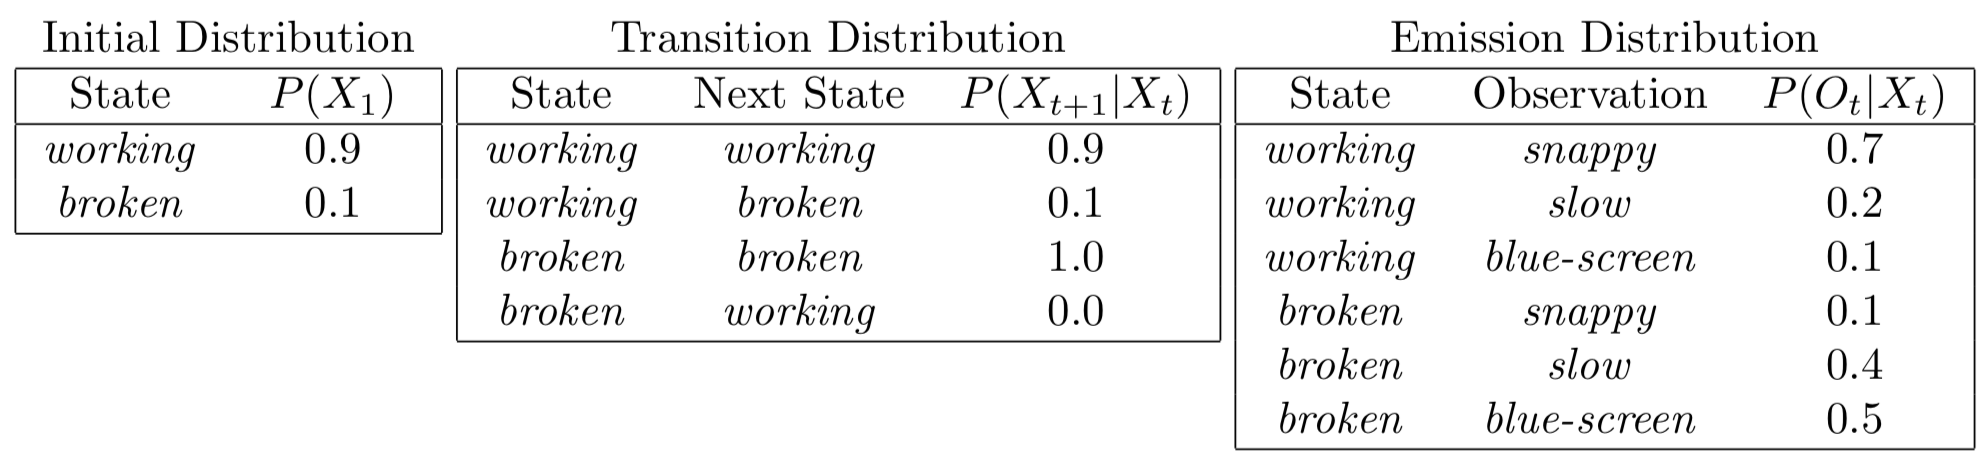


### (2a)
What is the posterior distribution of $X_1$, your computer's state on day one, given the observation (*slow*) on day 1? In other words, find $P(X_1 | E_1 = \textit{slow})$.

To find $P(X_1 | E_1 = \textit{slow})$, we will use the forward algorithm, that is:

$P(X_1 | E_1) = \alpha P(E_1 | X_1) \sum_{X_0} P(X_1 | X_0) P(X_0 | E_{1:0})$

However, we note that the term $\sum_{X_0} P(X_1 | X_0) P(X_0 | E_{1:0})$ simply provides $P(X_{t+1})$, which in this case is P(X_1), which we are given in the problem.  Therefore, our formula simplifies to:

$P(X_1 | E_1) = \alpha P(E_1 | X_1) P(X_1)$

In the form of a matrix, we need to solve the following:

$\begin{pmatrix} P(X_1 = \textit{working} | E_1 = \textit{slow}) \\ P(X_1 = \textit{broken} | E_1 = \textit{slow}) \end{pmatrix} = \alpha \begin{pmatrix} P(E_1 = \textit{slow} | X_1 = \textit{working}) \\ P(E_1 = \textit{slow} | X_1 = \textit{broken}) \end{pmatrix}\begin{pmatrix} P(X_1 = \textit{working}) \\ P(X_1 = \textit{broken}) \end{pmatrix}$

Pulling numbers from the above distributions, we have:

$P(E_1 = \textit{slow} | X_1 = \textit{working}) = 0.2$

$P(E_1 = \textit{slow} | X_1 = \textit{broken}) = 0.4$

$P(X_1 = \textit{working}) = 0.9$

$P(X_1 = \textit{broken}) = 0.1$



$\begin{pmatrix} P(X_1 = \textit{working} | E_1 = \textit{slow}) \\ P(X_1 = \textit{broken} | E_1 = \textit{slow}) \end{pmatrix} = \alpha \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix}\begin{pmatrix} 0.9 \\ 0.1 \end{pmatrix}= \alpha \begin{pmatrix} 0.18 \\ 0.04 \end{pmatrix}$

Solving for alpha, we get $P(X_1 = \textit{working}) = 0.8181$ and $P(X_1 = \textit{broken}) = 0.1818$

### (2b)
What is the posterior distribution of $X_2$, your computer's state on day two, given the observation sequence (*slow*, *slow*)?

We will use the same forward algorithm:

$\begin{pmatrix} P(X_2 = \textit{working} | E_2 = \textit{slow}) \\ P(X_2 = \textit{broken} | E_2 = \textit{slow}) \end{pmatrix} = \alpha \begin{pmatrix} P(E_2 = \textit{slow} | X_2 = \textit{working}) \\ P(E_2 = \textit{slow} | X_2 = \textit{broken}) \end{pmatrix} \sum_{X_1} \begin{pmatrix} P(X_2 | X_1) P(X_1 | E_{2:1})\end{pmatrix}$

$= \alpha \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix} \begin{pmatrix} P(X_2 = \textit{working} | X_1 = \textit{working}) \\ P(X_2 = \textit{borken} | X_1 = \textit{working}) \end{pmatrix} \begin{pmatrix} P(X_1 = \textit{working})\end{pmatrix} + \begin{pmatrix} P(X_2 = \textit{working} | X_1 = \textit{broken}) \\ P(X_2 = \textit{borken} | X_1 = \textit{broken}) \end{pmatrix} \begin{pmatrix} P(X_1 = \textit{broken})\end{pmatrix}$

$= \alpha \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix} \begin{pmatrix} 0.9 \\ 0.1 \end{pmatrix} \begin{pmatrix} 0.8181\end{pmatrix} + \begin{pmatrix} 0.0 \\ 1.0 \end{pmatrix} \begin{pmatrix} 0.1818\end{pmatrix}$

$= \alpha \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix} \begin{pmatrix} 0.73629 + 0.0 \\ 0.08181 + 0.1818 \end{pmatrix}$

$= \alpha \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix} \begin{pmatrix} 0.73629 \\ 0.26361 \end{pmatrix}$

$= \alpha \begin{pmatrix} 0.147258 \\ 0.105444 \end{pmatrix}$

Solving for alpha, we see that $P(X_2 = \textit{working} | E_2 = \textit{slow}) = 0.58273$ and $P(X_2 = \textit{broken} | E_2 = \textit{slow}) = 0.41727$

<br>

---

## Problem 3: your very own MDP

For this problem, you do not need to write any code, but rather communicate your ideas clearly using complete sentences and descriptions of the concepts the questions ask about. You can, of course, include some pseudocode if it helps, but that is not strictly necessary.

### (3a)

Describe something you think would be interesting to model using a Markov decision process.  Be **creative** - do not use any examples from your homework, class, or the textbook, and if you are working with other students, please **come up with your own example**. There are so, SO many possible answers!

It would be interesting to use a Markov decision process to model investment decisions in the public equity markets.  This could be applied to options trading, bonds, stocks, real estate, portfolio management, etc.  In my example I'll describe a process that could be applied to investing in a single stock.

### (3b)

What are the states associated with your MDP?

We'll use a single state that is the current dollar value of our investment holdings (# of shares x market value per share)

### (3c)

What is the reward structure associated with your MDP?  Include a discussion of terminal/non-terminal states.

Terminal states would be $0 (we lost our monies invested), and then a threshold as to where we would sell our holdings.  The threshold would have to be based on a targeted return (i.e. we sell when we reach an ROI of 20%, or something similar).  The non-termial states is anything in between 0 and our targeted ROI.  If we define m to be money invested and s to be current value, then the rewared structure would look like this:

    if s == 0:
        return -m         #we lost monies invested
    elif (s-m)/m >= 0.20: #we have retrun in excess of 20%
        return s-m
    else:
        return -0.01      #return default

### (3d)

What are the actions and transition model associated with your MDP?

We would need the actions to be buy or hold.  Note that in this example, we would only sell once we reach the desired ROI.  That's probably an overly-simplistic assumption for real world investing, but it works in this example.  We would also likely need to define a maximum amount of money we can invest so as we don't keep buying stock in each state.

For the transition model, there would need to be a probability distribution represeting the change in stock price in the following state. There are a number of ways this could be implemented, but I would envision having schedule of percentage returns on the stock (say in the range -15% to +15%) and a probability associated with each value in the range.  This could be developed from historical stock data, market reseach, etc. 

### (3e)

Interpret what an optimal policy represents in the context of your particular MDP.

For each state, the optimal policy would represent whether we should buy more shares or hold our current shares in order to maximize our return.  This could provide some interesting results, as many public companines have significant short-term volatility due to things such as seasonality and quarterly earnings reports.

## Unit test

In [5]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        nrow = 3
        ncol = 3
        default_reward = -0.2
        discount = 0.5
        terminal = {(1,3):-1, (1,2):2}
        self.mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    def test_actions_some(self):
        self.assertEqual(set(self.mdp.actions((2,2))) == {'N','S','E','W'}, True)
    def test_actions_few(self):
        self.assertEqual(set(self.mdp.actions((1,1))) == {'N','E'}, True)
    def test_actions_none(self):
        self.assertEqual(set(self.mdp.actions((1,2))) == {None}, True)
    def test_reward_t(self):
        self.assertEqual(self.mdp.reward((1,2)) == 2, True)
    def test_reward_nt(self):
        self.assertEqual(self.mdp.reward((2,2)) == -0.2, True)
    def test_result_nt(self):
        self.assertEqual(self.mdp.result((1,1), 'N') == (1,2), True)